In [1]:
import numpy as np
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
from linetools.spectra import utils as ltsu
from linetools.spectra.xspectrum1d import XSpectrum1D
import astropy.units as u
from array import array

In [2]:
gal_1 = XSpectrum1D.from_file('/home/sebastian/Spectra/spec/c16_24_zph2.3_15045_F.fits')

gal_2 = XSpectrum1D.from_file('/home/sebastian/Spectra/spec/c16_18_zph2.4_17949_F.fits')

gal_3 = XSpectrum1D.from_file('/home/sebastian/Spectra/spec/c16_20_zph2.4_17955_F.fits')

gal_4 = XSpectrum1D.from_file('/home/sebastian/Spectra/spec/c16_22_zph2.4_15040_F.fits')

gal_5 = XSpectrum1D.from_file('/home/sebastian/Spectra/spec/c16_11_zph2.3_12434_F.fits')


In [3]:
spec_list = [gal_1, gal_2, gal_3,gal_4, gal_5]

z_val= ([2.128,1.94,2.51,2.54,2.42])

In [20]:
flux_av = []

for i in range(len(spec_list)):
    
    flux_av.append(np.median(spec_list[i].flux))
    
factor = max(flux_av)
    
scale = []    
        
for number in flux_av:
    
    scale.append(factor/(number))

In [21]:
scaled_spec = []

for i in range(len(spec_list)):
    
    scaled_spec.append(XSpectrum1D(spec_list[i].wavelength,spec_list[i].flux*scale[i],spec_list[i].sig))
    

    

/home/sebastian/linetools/linetools/spectra/xspectrum1d.py:248: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


In [22]:
collate = ltsu.collate(spec_list)

restspec = ltsu.rebin_to_rest(collate,z_val,200*u.km/u.s)

In [23]:
five_stack = ltsu.smash_spectra(restspec)

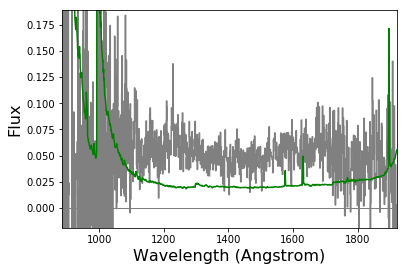

In [25]:
five_stack.plot()